In [1]:
#Evrişimli Derin Sinir Ağları (Convolutional Deep Neural Networks)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical #one hot encoding
"""
integer encoding (label encoding): sarı-kırmızı-lacivert (0-1-2)
one-hot encoding (binary encoding): sarı-kırmızı-lacivert (001-010-100)
"""

'\ninteger encoding (label encoding): sarı-kırmızı-lacivert (0-1-2)\none-hot encoding (binary encoding): sarı-kırmızı-lacivert (001-010-100)\n'

In [18]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

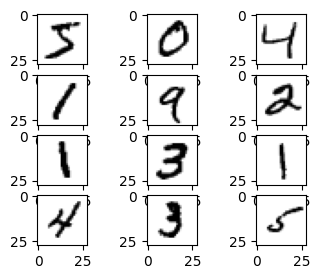

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [20]:
#Keras boyut arttırma 2D->3D
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [21]:
#one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
#normalizasyon
X_train = X_train / 255 #RGB (0-255)
X_test = X_test / 255

In [23]:
#Keras modelimizi oluşturalım
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

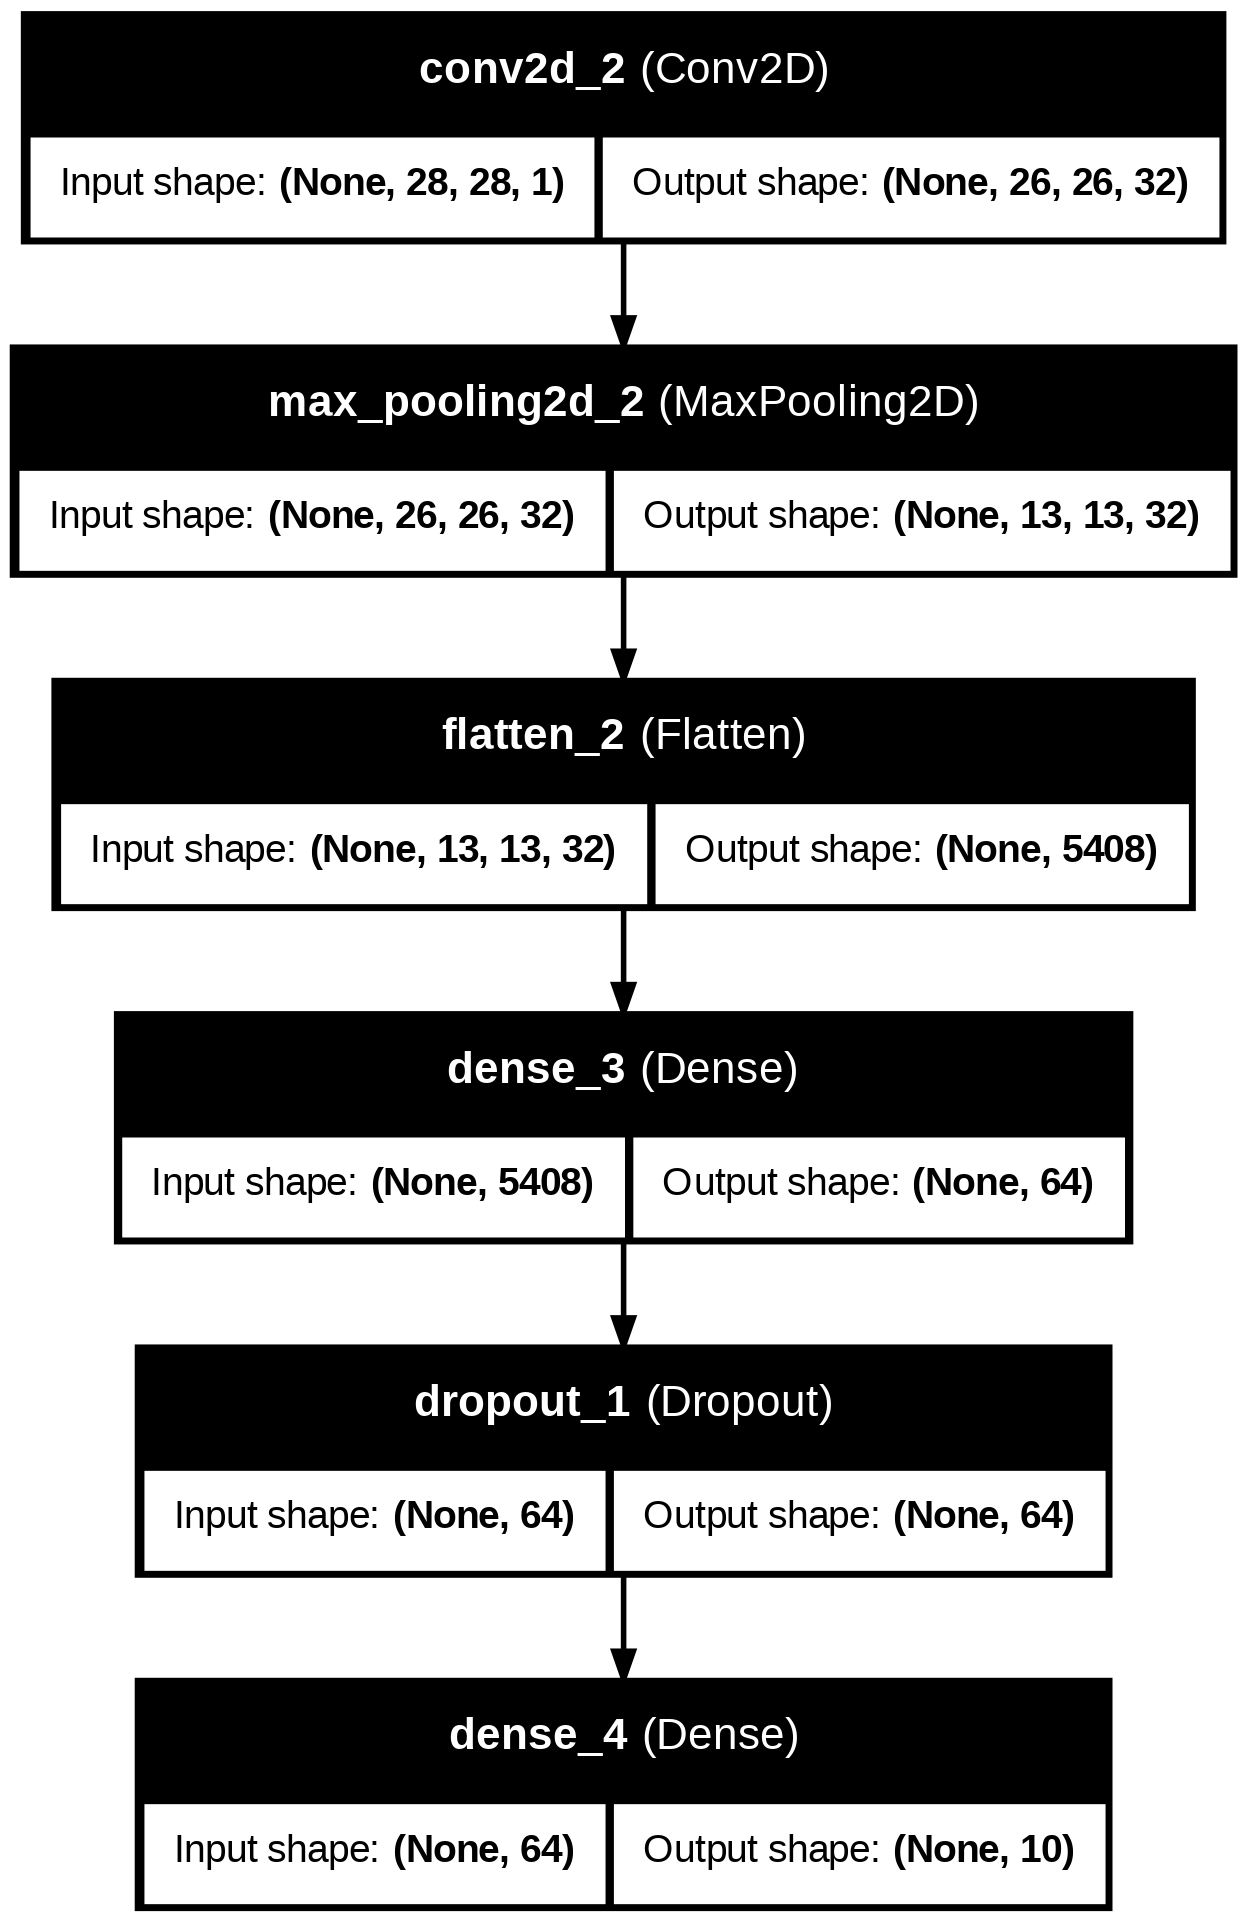

In [25]:
keras.utils.plot_model(model, "29042025AcunmedyaAI.png", show_shapes = True, show_layer_names = True)

In [26]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)

Epoch 1/5
3000/3000 - 19s - 6ms/step - accuracy: 0.8879 - loss: 0.3690 - val_accuracy: 0.9660 - val_loss: 0.1193
Epoch 2/5
3000/3000 - 17s - 6ms/step - accuracy: 0.9401 - loss: 0.1953 - val_accuracy: 0.9725 - val_loss: 0.0942
Epoch 3/5
3000/3000 - 17s - 6ms/step - accuracy: 0.9531 - loss: 0.1508 - val_accuracy: 0.9780 - val_loss: 0.0757
Epoch 4/5
3000/3000 - 17s - 6ms/step - accuracy: 0.9607 - loss: 0.1271 - val_accuracy: 0.9782 - val_loss: 0.0762
Epoch 5/5
3000/3000 - 17s - 6ms/step - accuracy: 0.9657 - loss: 0.1111 - val_accuracy: 0.9805 - val_loss: 0.0682


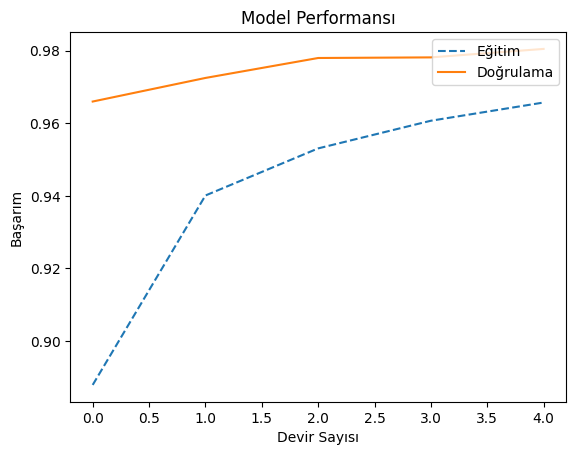

In [27]:
#Performans
plt.plot(history.history['accuracy'], '--')
plt.plot(history.history['val_accuracy'])
plt.title('Model Performansı')
plt.ylabel('Başarım')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim', 'Doğrulama'], loc = 'upper right')
plt.show()

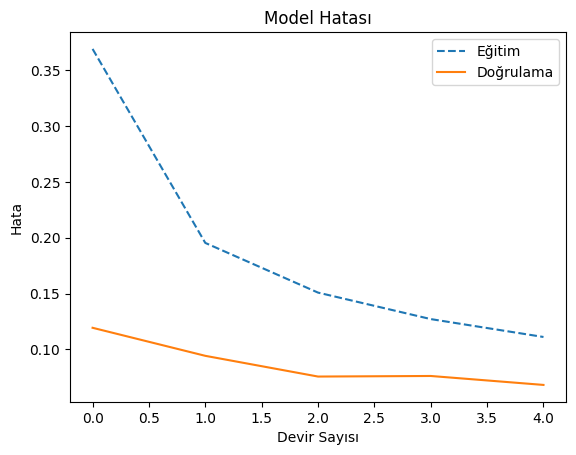

In [28]:
#Hata
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('Model Hatası')
plt.ylabel('Hata')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim', 'Doğrulama'], loc = 'upper right')
plt.show()

In [29]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Test Performansı: %.2f%%" % (performans[1]*100)) 

Modelin Test Performansı: 97.95%


In [30]:
#Tekrarlayan/Geri Dönüşlü Derin Sinir Ağları (Recurrent Deep Neural Networks)
#Sentiment Analysis (Duygu Analizi), IMDB Veri Kümesi

In [38]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.preprocessing import sequence

In [32]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [33]:
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [34]:
print(X_train.shape)

(25000,)


In [35]:
print(X_test.shape)

(25000,)


In [39]:
max_kelime = 500 #500 uzunluklu vektör yani kelime ile duygu analizini yapacağız
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

In [40]:
print(X_train.shape)

(25000, 500)


In [42]:
#Model mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = 'sigmoid'))

In [43]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

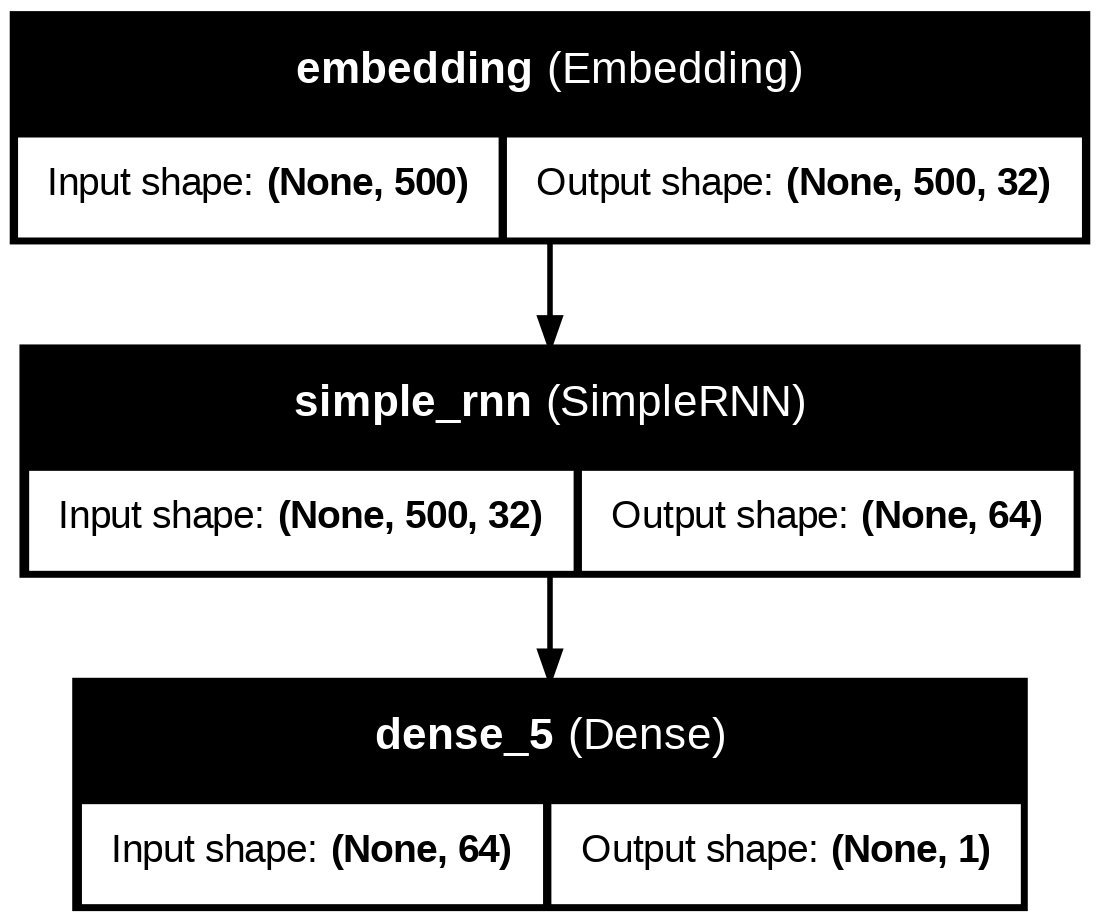

In [44]:
import keras
model.build(input_shape = (None, max_kelime))
keras.utils.plot_model(model, "AcunmedyaAI-IMDB-RNN-modeli-29042025.png", show_shapes = True, show_layer_names = True)

In [45]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.5444 - loss: 0.6848 - val_accuracy: 0.7116 - val_loss: 0.5778
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.7695 - loss: 0.4991 - val_accuracy: 0.7898 - val_loss: 0.4681
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.7969 - loss: 0.4429 - val_accuracy: 0.7336 - val_loss: 0.5484
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.8166 - loss: 0.4414 - val_accuracy: 0.8460 - val_loss: 0.3737
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - accuracy: 0.8820 - loss: 0.2897 - val_accuracy: 0.8414 - val_loss: 0.4004
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - accuracy: 0.8996 - loss: 0.2613 - val_accuracy: 0.8498 - val_loss: 0.3492
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - accuracy: 0.9270 - loss: 0.2007 - val_accuracy: 0.8552 - val_loss: 0.3462
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - accuracy: 0.9388 - loss: 0.1666 - val_accu

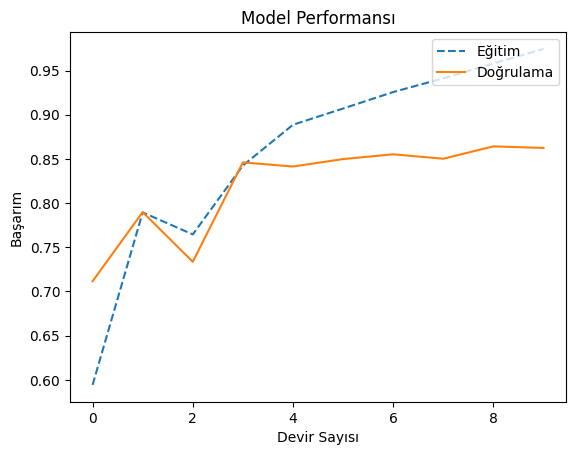

In [46]:
#Performans
plt.plot(history.history['accuracy'], '--')
plt.plot(history.history['val_accuracy'])
plt.title('Model Performansı')
plt.ylabel('Başarım')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim', 'Doğrulama'], loc = 'upper right')
plt.show()

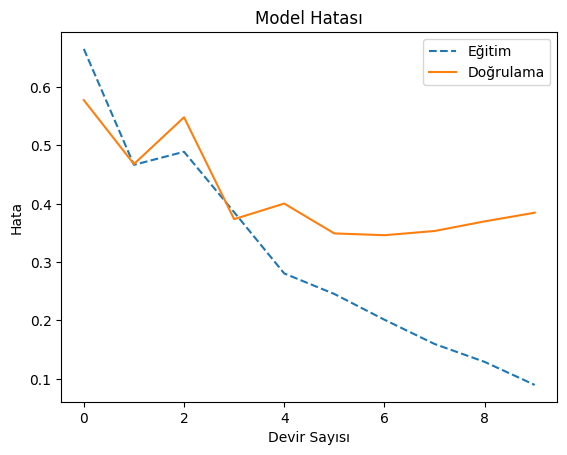

In [47]:
#Hata
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('Model Hatası')
plt.ylabel('Hata')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim', 'Doğrulama'], loc = 'upper right')
plt.show()

In [48]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Test Performansı: %.2f%%" % (performans[1]*100)) 

Modelin Test Performansı: 85.78%


In [ ]:
#Test
yorum = 'This movie is time wasting'